# 카드사 고객 분석
도메인 정보
```
CUST_ID	신용카드 사용자 식별자 (범주형 데이터)
BALANCE	사용자가 구매를 위해 계좌에 남겨놓은 잔액
BALANCE_FREQUENCY	잔액이 얼마나 자주 업데이트되는지를 나타내는 점수 (0 ~ 1 사이, 1에 가까울수록 자주 업데이트됨)
PURCHASES	계좌를 통해 이루어진 총 구매 금액
ONEOFF_PURCHASES	한 번에 이루어진 최대 금액의 구매
INSTALLMENTS_PURCHASES	할부로 이루어진 구매 금액 총합
CASH_ADVANCE	사용자가 받은 선불 현금 금액
PURCHASES_FREQUENCY	얼마나 자주 구매가 이루어졌는지를 나타내는 점수 (0 ~ 1 사이)
ONEOFFPURCHASESFREQUENCY	한 번에 이루어지는 구매의 빈도 (0 ~ 1 사이)
PURCHASESINSTALLMENTSFREQUENCY	할부 구매가 얼마나 자주 이루어졌는지를 나타내는 빈도 점수 (0 ~ 1 사이)
CASHADVANCEFREQUENCY	선불 현금 인출이 얼마나 자주 이루어졌는지 (0 ~ 1 사이)
CASHADVANCETRX	선불 현금 인출 거래 횟수
PURCHASES_TRX	총 구매 거래 횟수
CREDIT_LIMIT	사용자에게 부여된 신용카드 한도
PAYMENTS	사용자가 지불한 총 금액
MINIMUM_PAYMENTS	사용자가 납부한 최소 금액
PRCFULLPAYMENT	전액 결제한 비율 (0 ~ 1 사이)
TENURE	사용자의 신용카드 사용 기간
```

## EDA

In [3]:
# 카드사 고객 분석
import pandas as pd

df = pd.read_csv("C:\python_src\pandas-data-analysis\part7\data\CC-GENERAL.csv")

df.head()

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15492\231710874.py:4: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("C:\python_src\pandas-data-analysis\part7\data\CC-GENERAL.csv")


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
credit_df = df.copy()

credit_df = credit_df.drop(columns=['CUST_ID'])
credit_df = credit_df.dropna(subset=['CREDIT_LIMIT'])

In [11]:
credit_df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# MINIMUM_PAYMENTS 결측치 채우기 - 평균으로
# 1.
credit_df['MINIMUM_PAYMENTS'] = credit_df.MINIMUM_PAYMENTS.fillna(credit_df.MINIMUM_PAYMENTS.mean())

In [16]:
credit_df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# 2. 객체가 저장하고 있음
#   - 결측치가 여러 컬럼일 때, 한 번에 수행할 수 있다.

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# imputer.fit_transform(credit_df)

### 이상치 여부 확인하기
- boxplot

<Axes: >

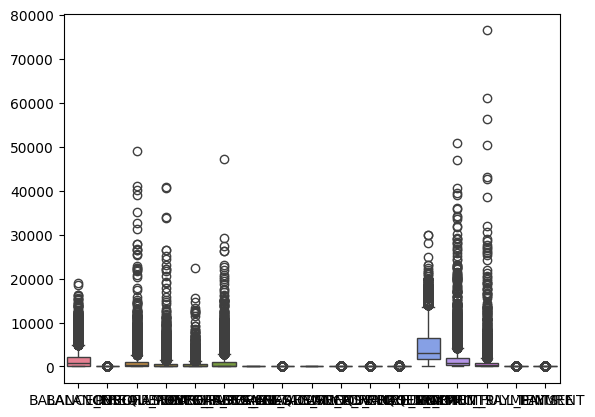

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=credit_df)

### 스케일링

In [ ]:
# Min-max Scaling
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()

df_scaled = sclaer.fit_transform(credit_df)
df_scaled

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.31099471,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.08926366,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.10170048,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.33549146,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.3469319 ,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.33297251,
        -0.52558844, -4.12691899]], shape=(8949, 17))

### 최적의 k 찾기

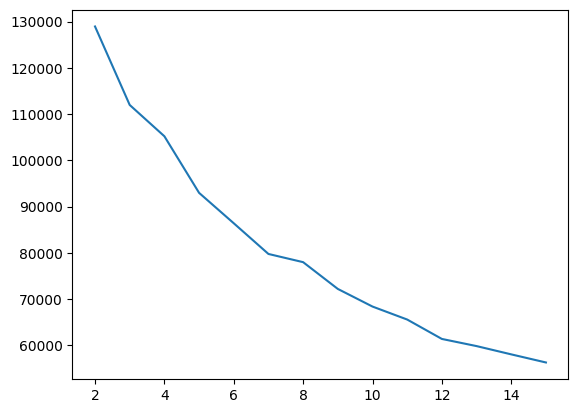

In [23]:
# 최적의 k 찾기 - 엘보우
from sklearn.cluster import KMeans

k_lists = []
for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    k_lists.append(km.inertia_)
plt.plot(range(2,16),k_lists)

In [25]:
# k=4
km = KMeans(n_clusters=4,random_state=42)
clusters = km.fit_predict(df_scaled)

credit_df['clusters'] = clusters

In [27]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [32]:
# 클러스터를 구분하는데 중요도가 높은 컬럼 찾기
# 특성 중요도
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)

tree.fit(credit_df.drop(columns=['clusters']), credit_df.clusters)
tree.feature_importances_

array([0.00902932, 0.        , 0.3087426 , 0.        , 0.        ,
       0.30372584, 0.        , 0.        , 0.        , 0.02474178,
       0.        , 0.03875148, 0.        , 0.        , 0.        ,
       0.        , 0.31500898])

In [33]:
import numpy as np
np.argsort(tree.feature_importances_)[::-1]

array([16,  2,  5, 11,  9,  0, 12, 15, 14,  8, 10, 13,  7,  4,  6,  3,  1])